# <center> Assignment 1 </center>

You are given a list of target values of a binary classification problem, and a list of corresponding predicted scores from a model. Please evaluate the preformance of the model in the following aspects. 

In [1]:
import matplotlib.pyplot as plt

### Read the target values and predicted scores into lists
def read_from_file(filename):
    file = open(filename, "r") 
    s = file.read()
    lines = s.split('\n')
    return [float(x) for x in lines]

target = read_from_file('target.csv')
pred = read_from_file('pred.csv')

### Question 1. Assume the target level 1 is positive, and 0 is negative. Given a threshold 0.3, show the confusion matrix.

In [2]:
def getConfusionMatrix(tar, pre, threshold):
    matrix = [[0,0], [0,0]]
    for i in range(len(tar)):
        p = pre[i]
        t = tar[i]
        if t == 1:
            if p >= threshold:
                matrix[0][0] += 1
            else:
                matrix[0][1] += 1
        else:
            if p >= threshold:
                matrix[1][0] += 1
            else:
                matrix[1][1] += 1
    return matrix

cm = getConfusionMatrix(target, pred, 0.3)

print("              Prediction")
print("              1          0     ")
print("        ________________________")
print("      1 |   %d    |    %d    |" %(cm[0][0], cm[0][1]))
print("target  ")
print("      0 |    %d    |    %d   |" % (cm[1][0], cm[1][1]))
print("        ________________________ ")



              Prediction
              1          0     
        ________________________
      1 |   577    |    395    |
target  
      0 |    11    |    1682   |
        ________________________ 


### Question 2. What are the following values based on the confusion matrix in Question 1? TPR, FPR, TNR, FNR, Precision, Recall, F1-measure.

In [3]:

TPR = cm[0][0] / (cm[0][0] + cm[0][1])
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[1][0] / (cm[1][0] + cm[1][1])
FNR = cm[0][1] / (cm[0][0] + cm[0][1])
Precision = cm[0][0] / (cm[0][0] + cm[1][0])
Recall = cm[0][0] / (cm[0][0] + cm[0][1])
F1 = 2 * (Precision * Recall) / (Precision + Recall) 

print("TPR = %.4f" % TPR)
print("TNR = %.4f" % TNR)
print("FPR = %.4f" % FPR)
print("FNR = %.4f" % FNR)
print("Precision = %.4f" % Precision)
print("Recall = %.4f" % Recall)
print("F1-measure = %.4f" % F1)

TPR = 0.5936
TNR = 0.9935
FPR = 0.0065
FNR = 0.4064
Precision = 0.9813
Recall = 0.5936
F1-measure = 0.7397


### Question 3. Draw ROC curve

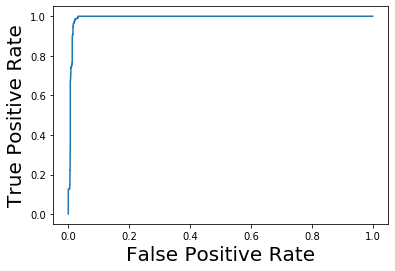

In [4]:
import matplotlib.pyplot as plt
def getTPRFPR(tar, pre, threshold):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(tar)):
        if tar[i] == 1 and pred[i] >= threshold:
            tp += 1
        elif tar[i] == 0 and pred[i] >= threshold:
            fp += 1
        elif tar[i] == 1 and pred[i] < threshold:
            fn += 1
        elif tar[i] == 0 and pred[i] < threshold:
            tn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)
    return fpr, tpr

# use the predicted scores as thresholds
fprList = []
tprList = []
ordered_score = sorted(pred, reverse=True)
for score in ordered_score:
    fpr,tpr = getTPRFPR(target, pred, score)
    fprList.append(fpr)
    tprList.append(tpr)
    
plt.plot(fprList,tprList)
plt.xlabel('False Positive Rate', fontsize=20) 
plt.ylabel('True Positive Rate', fontsize=20) 
plt.show()

### Question 4. What is the value of ROC Index?

In [5]:
# Need to make sure the points are ordered. Otherwise, you will get wrong answer (even negative solution).
rocindex = 0
for i in range(1, len(fprList)):
    rocindex += ((fprList[i] - fprList[i-1]) * (tprList[i] + tprList[i-1])) / 2
    
print("ROC index is %.4f." % (rocindex))


ROC index is 0.9922.
